In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [25]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
digits.data[0].shape

(64,)

In [27]:
digits.target.shape

(1797,)

(64,)
(64,)
(64,)
(64,)
(64,)


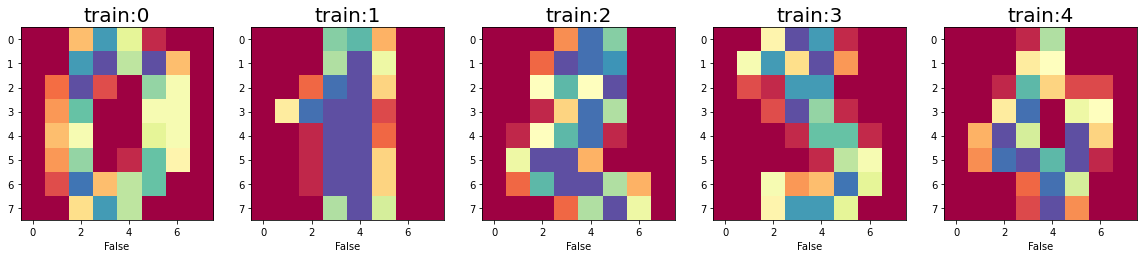

In [28]:
plt.figure(figsize=(20,7))

for i, (image,label) in enumerate(zip(digits.data[:5],digits.target[:5])):
    print(image.shape)
    plt.subplot(1,5, i+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.Spectral)
    plt.xlabel(False)
    plt.title(f"train:{label}",fontsize=20)

In [29]:
X = digits.data
y = digits.target
X.shape,y.shape

((1797, 64), (1797,))

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=2)
X_train.shape

(1383, 64)

In [31]:
from sklearn.linear_model import LogisticRegression

logregressor = LogisticRegression(solver="liblinear")
logregressor.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [32]:
logregressor.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [33]:
logregressor.predict(X_test[0].reshape(1,-1))

array([4])

In [34]:
predictions = logregressor.predict(X_test)
predictions

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 1, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       8, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 1, 4, 8,
       7, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 7, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 8, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 7, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [35]:
##accuracy
score = logregressor.score(X_test,y_test)
score


0.9420289855072463

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8514231196389328

In [37]:
cm = metrics.confusion_matrix(y_test,predictions)
cm


array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  3,  2,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 28]], dtype=int64)

Text(0.5, 1.0, 'accuracy:0.9420289855072463')

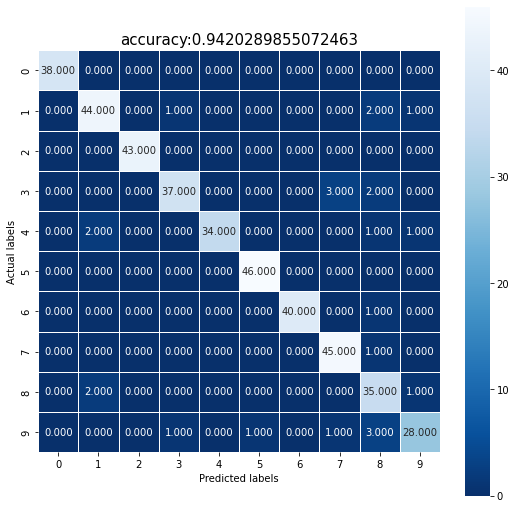

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r" )
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title(f"accuracy:{score}",size=15)

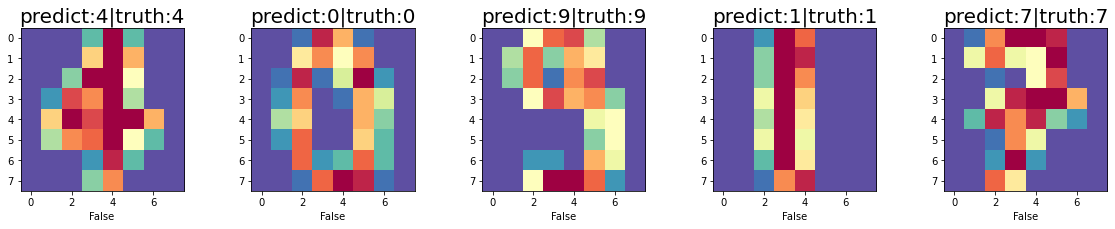

In [39]:
classified_correct_index = []
# index = 0
for index,(predict, actual) in enumerate(zip(predictions,y_test)):
    if predict == actual:
        classified_correct_index.append(index)
#     index +=1
plt.figure(figsize=(20,3))
for i, correct in enumerate(classified_correct_index[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(X_test[correct],(8,8)),cmap=plt.cm.Spectral_r)
    plt.xlabel(False)
    plt.title(f"predict:{predictions[correct]}|truth:{y_test[correct]}",fontsize=20)

In [40]:
predictions

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 1, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       8, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 1, 4, 8,
       7, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 7, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 8, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 7, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [41]:
(predictions == y_test)[:6]

array([ True,  True,  True,  True, False,  True])